# TODO LIST Minggu, 26 Juni 2022

- [ ] Dataset nya banyak yg duplicate brooo, ampas kali lah
- [ ] Drop columns yang gk penting
- [ ] Lanjutin EDA

# [INSERT TITLE FOR THIS WORKSHOP]

by: shandytp

referensi bacaan : https://medium.com/crunchyroll/scaling-up-anime-with-machine-learning-and-smart-real-time-algorithms-2fb706ec56c0

### Import Library 

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

### Dataset Source
[Anime Dataset with Reviews - MyAnimeList](https://www.kaggle.com/datasets/marlesson/myanimelist-dataset-animes-profiles-reviews)

This dataset contains:

`- animes.csv`

`- reviews.csv`

`- profiles.csv`

In [2]:
DATA_PATH = 'data/'

In [3]:
data_anime = pd.read_csv(DATA_PATH + 'animes.csv')
data_review = pd.read_csv(DATA_PATH + 'reviews.csv')

In [4]:
print(data_anime.shape)
print(data_review.shape)

(19311, 12)
(192112, 7)


In [8]:
data_anime['uid'].duplicated()

0        False
1        False
2        False
3        False
4        False
         ...  
19306     True
19307     True
19308     True
19309     True
19310     True
Name: uid, Length: 19311, dtype: bool

In [11]:
data_anime.iloc[19310]

uid                                                          87
title                  Mobile Suit Gundam: Char's Counterattack
synopsis      The year is Universal Century 0093. Char Aznab...
genre         ['Military', 'Sci-Fi', 'Space', 'Drama', 'Mecha']
aired                                              Mar 12, 1988
episodes                                                    1.0
members                                                   29248
popularity                                                 2604
ranked                                                   1081.0
score                                                      7.73
img_url       https://cdn.myanimelist.net/images/anime/1523/...
link          https://myanimelist.net/anime/87/Mobile_Suit_G...
Name: 19310, dtype: object

In [12]:
data_anime[data_anime['uid'] == 87]

,uid,title,synopsis,genre,aired,episodes,members,popularity,ranked,score,img_url,link
1096,87,Mobile Suit Gundam: Char's Counterattack,The year is Universal Century 0093. Char Aznab...,"['Military', 'Sci-Fi', 'Space', 'Drama', 'Mecha']","Mar 12, 1988",1.0,29248,2604,1081.0,7.73,https://cdn.myanimelist.net/images/anime/1523/...,https://myanimelist.net/anime/87/Mobile_Suit_G...
4942,87,Mobile Suit Gundam: Char's Counterattack,The year is Universal Century 0093. Char Aznab...,"['Military', 'Sci-Fi', 'Space', 'Drama', 'Mecha']","Mar 12, 1988",1.0,29228,2603,1081.0,7.73,https://cdn.myanimelist.net/images/anime/1523/...,https://myanimelist.net/anime/87/Mobile_Suit_G...
19310,87,Mobile Suit Gundam: Char's Counterattack,The year is Universal Century 0093. Char Aznab...,"['Military', 'Sci-Fi', 'Space', 'Drama', 'Mecha']","Mar 12, 1988",1.0,29248,2604,1081.0,7.73,https://cdn.myanimelist.net/images/anime/1523/...,https://myanimelist.net/anime/87/Mobile_Suit_G...


In [5]:
pd.concat(g for _, g in data_anime.groupby("uid") if len(g) > 1)

,uid,title,synopsis,genre,aired,episodes,members,popularity,ranked,score,img_url,link
764,1,Cowboy Bebop,"In the year 2071, humanity has colonized sever...","['Action', 'Adventure', 'Comedy', 'Drama', 'Sc...","Apr 3, 1998 to Apr 24, 1999",26.0,930311,39,26.0,8.81,https://cdn.myanimelist.net/images/anime/4/196...,https://myanimelist.net/anime/1/Cowboy_Bebop
18062,1,Cowboy Bebop,"In the year 2071, humanity has colonized sever...","['Action', 'Adventure', 'Comedy', 'Drama', 'Sc...","Apr 3, 1998 to Apr 24, 1999",26.0,930311,39,26.0,8.81,https://cdn.myanimelist.net/images/anime/4/196...,https://myanimelist.net/anime/1/Cowboy_Bebop
644,5,Cowboy Bebop: Tengoku no Tobira,"Another day, another bounty—such is the life o...","['Action', 'Drama', 'Mystery', 'Sci-Fi', 'Space']","Sep 1, 2001",1.0,223199,475,149.0,8.40,https://cdn.myanimelist.net/images/anime/1439/...,https://myanimelist.net/anime/5/Cowboy_Bebop__...
15230,5,Cowboy Bebop: Tengoku no Tobira,"Another day, another bounty—such is the life o...","['Action', 'Drama', 'Mystery', 'Sci-Fi', 'Space']","Sep 1, 2001",1.0,223199,475,149.0,8.40,https://cdn.myanimelist.net/images/anime/1439/...,https://myanimelist.net/anime/5/Cowboy_Bebop__...
542,6,Trigun,"Vash the Stampede is the man with a $$60,000,0...","['Action', 'Sci-Fi', 'Adventure', 'Comedy', 'D...","Apr 1, 1998 to Sep 30, 1998",26.0,460146,158,256.0,8.28,https://cdn.myanimelist.net/images/anime/7/203...,https://myanimelist.net/anime/6/Trigun
...,...,...,...,...,...,...,...,...,...,...,...,...
15045,40936,Ore wo Suki nano wa Omae dake ka yo: Oretachi ...,The original video anime episode will serve as...,"['Comedy', 'Romance', 'School']",2020,1.0,7976,16332,NaN,NaN,https://cdn.myanimelist.net/images/anime/1443/...,https://myanimelist.net/anime/40936/Ore_wo_Suk...
1511,40938,Hige wo Soru. Soshite Joshikousei wo Hirou.,Office worker Yoshida has been crushing on his...,"['Drama', 'Romance']",Not available,NaN,1485,16327,NaN,NaN,https://cdn.myanimelist.net/images/anime/1859/...,https://myanimelist.net/anime/40938/Hige_wo_So...
15067,40938,Hige wo Soru. Soshite Joshikousei wo Hirou.,Office worker Yoshida has been crushing on his...,"['Drama', 'Romance']",Not available,NaN,1485,16327,NaN,NaN,https://cdn.myanimelist.net/images/anime/1859/...,https://myanimelist.net/anime/40938/Hige_wo_So...
3028,40957,Shin Chuuka Ichiban! 2,Sequel of Shin Chuuka Ichiban,"['Comedy', 'Shounen']",Not available,NaN,601,16334,NaN,NaN,https://cdn.myanimelist.net/images/anime/1684/...,https://myanimelist.net/anime/40957/Shin_Chuuk...


In [6]:
pd.concat(g for _, g in data_review.groupby("anime_uid") if len(g) > 1)

,uid,profile,anime_uid,text,score,scores,link
35198,5740,RangFlash,1,\n \n \n \n ...,10,"{'Overall': '10', 'Story': '8', 'Animation': '...",https://myanimelist.net/reviews.php?id=5740
35200,48839,reinis-jan,1,\n \n \n \n ...,9,"{'Overall': '9', 'Story': '7', 'Animation': '9...",https://myanimelist.net/reviews.php?id=48839
35205,296203,maxeraturee,1,\n \n \n \n ...,10,"{'Overall': '10', 'Story': '0', 'Animation': '...",https://myanimelist.net/reviews.php?id=296203
35210,184551,Sephiroth1335,1,\n \n \n \n ...,8,"{'Overall': '8', 'Story': '8', 'Animation': '8...",https://myanimelist.net/reviews.php?id=184551
35215,159517,NeuronExploder,1,\n \n \n \n ...,10,"{'Overall': '10', 'Story': '9', 'Animation': '...",https://myanimelist.net/reviews.php?id=159517
...,...,...,...,...,...,...,...
136720,325323,animejas,40542,\n \n \n \n ...,7,"{'Overall': '7', 'Story': '7', 'Animation': '6...",https://myanimelist.net/reviews.php?id=325323
136722,325341,The-Rippled-One,40542,\n \n \n \n ...,7,"{'Overall': '7', 'Story': '6', 'Animation': '6...",https://myanimelist.net/reviews.php?id=325341
136725,325337,anime-prime,40542,\n \n \n \n ...,10,"{'Overall': '10', 'Story': '9', 'Animation': '...",https://myanimelist.net/reviews.php?id=325337
63078,323279,Biggie_Autism,40769,\n \n \n \n ...,7,"{'Overall': '7', 'Story': '7', 'Animation': '8...",https://myanimelist.net/reviews.php?id=323279


In [7]:
data_anime[data_anime.duplicated(['uid'], keep=False)]

,uid,title,synopsis,genre,aired,episodes,members,popularity,ranked,score,img_url,link
0,28891,Haikyuu!! Second Season,Following their participation at the Inter-Hig...,"['Comedy', 'Sports', 'Drama', 'School', 'Shoun...","Oct 4, 2015 to Mar 27, 2016",25.0,489888,141,25.0,8.82,https://cdn.myanimelist.net/images/anime/9/766...,https://myanimelist.net/anime/28891/Haikyuu_Se...
1,23273,Shigatsu wa Kimi no Uso,Music accompanies the path of the human metron...,"['Drama', 'Music', 'Romance', 'School', 'Shoun...","Oct 10, 2014 to Mar 20, 2015",22.0,995473,28,24.0,8.83,https://cdn.myanimelist.net/images/anime/3/671...,https://myanimelist.net/anime/23273/Shigatsu_w...
2,34599,Made in Abyss,The Abyss—a gaping chasm stretching down into ...,"['Sci-Fi', 'Adventure', 'Mystery', 'Drama', 'F...","Jul 7, 2017 to Sep 29, 2017",13.0,581663,98,23.0,8.83,https://cdn.myanimelist.net/images/anime/6/867...,https://myanimelist.net/anime/34599/Made_in_Abyss
3,5114,Fullmetal Alchemist: Brotherhood,"""In order for something to be obtained, someth...","['Action', 'Military', 'Adventure', 'Comedy', ...","Apr 5, 2009 to Jul 4, 2010",64.0,1615084,4,1.0,9.23,https://cdn.myanimelist.net/images/anime/1223/...,https://myanimelist.net/anime/5114/Fullmetal_A...
4,31758,Kizumonogatari III: Reiketsu-hen,After helping revive the legendary vampire Kis...,"['Action', 'Mystery', 'Supernatural', 'Vampire']","Jan 6, 2017",1.0,214621,502,22.0,8.83,https://cdn.myanimelist.net/images/anime/3/815...,https://myanimelist.net/anime/31758/Kizumonoga...
...,...,...,...,...,...,...,...,...,...,...,...,...
19306,32979,Flip Flappers,Cocona is an average middle schooler living wi...,"['Sci-Fi', 'Adventure', 'Comedy', 'Magic']","Oct 6, 2016 to Dec 29, 2016",13.0,134252,843,1070.0,7.73,https://cdn.myanimelist.net/images/anime/4/822...,https://myanimelist.net/anime/32979/Flip_Flappers
19307,123,Fushigi Yuugi,"While visiting the National Library, junior-hi...","['Adventure', 'Fantasy', 'Magic', 'Martial Art...","Apr 6, 1995 to Mar 28, 1996",52.0,84407,1292,1071.0,7.73,https://cdn.myanimelist.net/images/anime/2/201...,https://myanimelist.net/anime/123/Fushigi_Yuugi
19308,1281,Gakkou no Kaidan,"Years ago, all of the ghosts in a haunted scho...","['Mystery', 'Horror', 'Supernatural']","Oct 22, 2000 to Mar 25, 2001",19.0,83093,1314,1073.0,7.73,https://cdn.myanimelist.net/images/anime/9/183...,https://myanimelist.net/anime/1281/Gakkou_no_K...
19309,450,InuYasha Movie 2: Kagami no Naka no Mugenjo,Inuyasha and company have finally destroyed Na...,"['Action', 'Adventure', 'Comedy', 'Historical'...","Dec 21, 2002",1.0,71989,1469,1077.0,7.73,https://cdn.myanimelist.net/images/anime/1162/...,https://myanimelist.net/anime/450/InuYasha_Mov...


In [37]:
len(data_anime['anime_uid'].unique())

16216

In [41]:
6140 / 2

3070.0

In [42]:
16216 + 3070

19286

In [38]:
ids = data_anime['anime_uid']

In [39]:
data_anime[ids.isin(ids[ids.duplicated()])].sort_values("anime_uid")

,anime_uid,title,synopsis,genre,aired,episodes,members,popularity,ranked,score,img_url,link
764,1,Cowboy Bebop,"In the year 2071, humanity has colonized sever...","['Action', 'Adventure', 'Comedy', 'Drama', 'Sc...","Apr 3, 1998 to Apr 24, 1999",26.0,930311,39,26.0,8.81,https://cdn.myanimelist.net/images/anime/4/196...,https://myanimelist.net/anime/1/Cowboy_Bebop
18062,1,Cowboy Bebop,"In the year 2071, humanity has colonized sever...","['Action', 'Adventure', 'Comedy', 'Drama', 'Sc...","Apr 3, 1998 to Apr 24, 1999",26.0,930311,39,26.0,8.81,https://cdn.myanimelist.net/images/anime/4/196...,https://myanimelist.net/anime/1/Cowboy_Bebop
15230,5,Cowboy Bebop: Tengoku no Tobira,"Another day, another bounty—such is the life o...","['Action', 'Drama', 'Mystery', 'Sci-Fi', 'Space']","Sep 1, 2001",1.0,223199,475,149.0,8.40,https://cdn.myanimelist.net/images/anime/1439/...,https://myanimelist.net/anime/5/Cowboy_Bebop__...
644,5,Cowboy Bebop: Tengoku no Tobira,"Another day, another bounty—such is the life o...","['Action', 'Drama', 'Mystery', 'Sci-Fi', 'Space']","Sep 1, 2001",1.0,223199,475,149.0,8.40,https://cdn.myanimelist.net/images/anime/1439/...,https://myanimelist.net/anime/5/Cowboy_Bebop__...
542,6,Trigun,"Vash the Stampede is the man with a $$60,000,0...","['Action', 'Sci-Fi', 'Adventure', 'Comedy', 'D...","Apr 1, 1998 to Sep 30, 1998",26.0,460146,158,256.0,8.28,https://cdn.myanimelist.net/images/anime/7/203...,https://myanimelist.net/anime/6/Trigun
...,...,...,...,...,...,...,...,...,...,...,...,...
15045,40936,Ore wo Suki nano wa Omae dake ka yo: Oretachi ...,The original video anime episode will serve as...,"['Comedy', 'Romance', 'School']",2020,1.0,7976,16332,NaN,NaN,https://cdn.myanimelist.net/images/anime/1443/...,https://myanimelist.net/anime/40936/Ore_wo_Suk...
15067,40938,Hige wo Soru. Soshite Joshikousei wo Hirou.,Office worker Yoshida has been crushing on his...,"['Drama', 'Romance']",Not available,NaN,1485,16327,NaN,NaN,https://cdn.myanimelist.net/images/anime/1859/...,https://myanimelist.net/anime/40938/Hige_wo_So...
1511,40938,Hige wo Soru. Soshite Joshikousei wo Hirou.,Office worker Yoshida has been crushing on his...,"['Drama', 'Romance']",Not available,NaN,1485,16327,NaN,NaN,https://cdn.myanimelist.net/images/anime/1859/...,https://myanimelist.net/anime/40938/Hige_wo_So...
3028,40957,Shin Chuuka Ichiban! 2,Sequel of Shin Chuuka Ichiban,"['Comedy', 'Shounen']",Not available,NaN,601,16334,NaN,NaN,https://cdn.myanimelist.net/images/anime/1684/...,https://myanimelist.net/anime/40957/Shin_Chuuk...


In [21]:
data_anime.rename(columns = {'uid':'anime_uid'}, inplace = True)

In [22]:
data_anime.head()

,anime_uid,title,synopsis,genre,aired,episodes,members,popularity,ranked,score,img_url,link
0,28891,Haikyuu!! Second Season,Following their participation at the Inter-Hig...,"['Comedy', 'Sports', 'Drama', 'School', 'Shoun...","Oct 4, 2015 to Mar 27, 2016",25.0,489888,141,25.0,8.82,https://cdn.myanimelist.net/images/anime/9/766...,https://myanimelist.net/anime/28891/Haikyuu_Se...
1,23273,Shigatsu wa Kimi no Uso,Music accompanies the path of the human metron...,"['Drama', 'Music', 'Romance', 'School', 'Shoun...","Oct 10, 2014 to Mar 20, 2015",22.0,995473,28,24.0,8.83,https://cdn.myanimelist.net/images/anime/3/671...,https://myanimelist.net/anime/23273/Shigatsu_w...
2,34599,Made in Abyss,The Abyss—a gaping chasm stretching down into ...,"['Sci-Fi', 'Adventure', 'Mystery', 'Drama', 'F...","Jul 7, 2017 to Sep 29, 2017",13.0,581663,98,23.0,8.83,https://cdn.myanimelist.net/images/anime/6/867...,https://myanimelist.net/anime/34599/Made_in_Abyss
3,5114,Fullmetal Alchemist: Brotherhood,"""In order for something to be obtained, someth...","['Action', 'Military', 'Adventure', 'Comedy', ...","Apr 5, 2009 to Jul 4, 2010",64.0,1615084,4,1.0,9.23,https://cdn.myanimelist.net/images/anime/1223/...,https://myanimelist.net/anime/5114/Fullmetal_A...
4,31758,Kizumonogatari III: Reiketsu-hen,After helping revive the legendary vampire Kis...,"['Action', 'Mystery', 'Supernatural', 'Vampire']","Jan 6, 2017",1.0,214621,502,22.0,8.83,https://cdn.myanimelist.net/images/anime/3/815...,https://myanimelist.net/anime/31758/Kizumonoga...


In [30]:
data_anime[data_anime['anime_uid'] == 23273]

,anime_uid,title,synopsis,genre,aired,episodes,members,popularity,ranked,score,img_url,link
1,23273,Shigatsu wa Kimi no Uso,Music accompanies the path of the human metron...,"['Drama', 'Music', 'Romance', 'School', 'Shoun...","Oct 10, 2014 to Mar 20, 2015",22.0,995473,28,24.0,8.83,https://cdn.myanimelist.net/images/anime/3/671...,https://myanimelist.net/anime/23273/Shigatsu_w...
3078,23273,Shigatsu wa Kimi no Uso,Music accompanies the path of the human metron...,"['Drama', 'Music', 'Romance', 'School', 'Shoun...","Oct 10, 2014 to Mar 20, 2015",22.0,995473,28,24.0,8.83,https://cdn.myanimelist.net/images/anime/3/671...,https://myanimelist.net/anime/23273/Shigatsu_w...


In [23]:
data_anime.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19311 entries, 0 to 19310
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   anime_uid   19311 non-null  int64  
 1   title       19311 non-null  object 
 2   synopsis    18336 non-null  object 
 3   genre       19311 non-null  object 
 4   aired       19311 non-null  object 
 5   episodes    18605 non-null  float64
 6   members     19311 non-null  int64  
 7   popularity  19311 non-null  int64  
 8   ranked      16099 non-null  float64
 9   score       18732 non-null  float64
 10  img_url     19131 non-null  object 
 11  link        19311 non-null  object 
dtypes: float64(3), int64(3), object(6)
memory usage: 1.8+ MB


In [10]:
data_anime['score'].value_counts()

6.13    136
6.11    135
6.14    124
6.10    115
6.09    114
       ... 
3.78      1
2.85      1
3.12      1
3.10      1
2.62      1
Name: score, Length: 580, dtype: int64

In [7]:
data_review.head().T

,0,1,2,3,4
uid,255938,259117,253664,8254,291149
profile,DesolatePsyche,baekbeans,skrn,edgewalker00,aManOfCulture99
anime_uid,34096,34599,28891,2904,4181
text,\n \n \n \n ...,\n \n \n \n ...,\n \n \n \n ...,\n \n \n \n ...,\n \n \n \n ...
score,8,10,7,9,10
scores,"{'Overall': '8', 'Story': '8', 'Animation': '8...","{'Overall': '10', 'Story': '10', 'Animation': ...","{'Overall': '7', 'Story': '7', 'Animation': '9...","{'Overall': '9', 'Story': '9', 'Animation': '9...","{'Overall': '10', 'Story': '10', 'Animation': ..."
link,https://myanimelist.net/reviews.php?id=255938,https://myanimelist.net/reviews.php?id=259117,https://myanimelist.net/reviews.php?id=253664,https://myanimelist.net/reviews.php?id=8254,https://myanimelist.net/reviews.php?id=291149


In [17]:
data_review[data_review['uid'] == 259117]

,uid,profile,anime_uid,text,score,scores,link
1,259117,baekbeans,34599,\n \n \n \n ...,10,"{'Overall': '10', 'Story': '10', 'Animation': ...",https://myanimelist.net/reviews.php?id=259117
60898,259117,baekbeans,34599,\n \n \n \n ...,10,"{'Overall': '10', 'Story': '10', 'Animation': ...",https://myanimelist.net/reviews.php?id=259117


In [18]:
data_anime[data_anime['uid'] == 34599]

,uid,title,synopsis,genre,aired,episodes,members,popularity,ranked,score,img_url,link
2,34599,Made in Abyss,The Abyss—a gaping chasm stretching down into ...,"['Sci-Fi', 'Adventure', 'Mystery', 'Drama', 'F...","Jul 7, 2017 to Sep 29, 2017",13.0,581663,98,23.0,8.83,https://cdn.myanimelist.net/images/anime/6/867...,https://myanimelist.net/anime/34599/Made_in_Abyss
3079,34599,Made in Abyss,The Abyss—a gaping chasm stretching down into ...,"['Sci-Fi', 'Adventure', 'Mystery', 'Drama', 'F...","Jul 7, 2017 to Sep 29, 2017",13.0,581663,98,23.0,8.83,https://cdn.myanimelist.net/images/anime/6/867...,https://myanimelist.net/anime/34599/Made_in_Abyss


In [35]:
len(data_review['uid'].unique())

130519

In [11]:
data_review['score'].value_counts()

10    42007
9     39695
8     34814
7     25826
6     16497
5     11154
4      7537
3      7204
2      3815
1      3561
0         1
11        1
Name: score, dtype: int64

In [32]:
data_review[data_review['uid'] == 182712]

,uid,profile,anime_uid,text,score,scores,link
30723,182712,henyome,23273,\n \n \n \n ...,9,"{'Overall': '9', 'Story': '9', 'Animation': '9...",https://myanimelist.net/reviews.php?id=182712
149999,182712,henyome,23273,\n \n \n \n ...,9,"{'Overall': '9', 'Story': '9', 'Animation': '9...",https://myanimelist.net/reviews.php?id=182712


In [33]:
data_review[data_review['anime_uid'] == 23273]

,uid,profile,anime_uid,text,score,scores,link
30704,189379,phs_togusa,23273,\n \n \n \n ...,6,"{'Overall': '6', 'Story': '5', 'Animation': '9...",https://myanimelist.net/reviews.php?id=189379
30705,182731,Glacialis,23273,\n \n \n \n ...,9,"{'Overall': '9', 'Story': '9', 'Animation': '8...",https://myanimelist.net/reviews.php?id=182731
30706,192084,alphacompton,23273,\n \n \n \n ...,6,"{'Overall': '6', 'Story': '9', 'Animation': '1...",https://myanimelist.net/reviews.php?id=192084
30707,183046,Tozzy,23273,\n \n \n \n ...,6,"{'Overall': '6', 'Story': '6', 'Animation': '8...",https://myanimelist.net/reviews.php?id=183046
30708,187134,guywholikesanime,23273,\n \n \n \n ...,4,"{'Overall': '4', 'Story': '3', 'Animation': '1...",https://myanimelist.net/reviews.php?id=187134
30709,183884,Johan,23273,\n \n \n \n ...,10,"{'Overall': '10', 'Story': '9', 'Animation': '...",https://myanimelist.net/reviews.php?id=183884
30710,303196,simplydru,23273,\n \n \n \n ...,3,"{'Overall': '3', 'Story': '3', 'Animation': '1...",https://myanimelist.net/reviews.php?id=303196
30711,182940,poorqs,23273,\n \n \n \n ...,10,"{'Overall': '10', 'Story': '10', 'Animation': ...",https://myanimelist.net/reviews.php?id=182940
30712,180393,yaotomesoba,23273,\n \n \n \n ...,5,"{'Overall': '5', 'Story': '6', 'Animation': '1...",https://myanimelist.net/reviews.php?id=180393
30713,186483,literaturenerd,23273,\n \n \n \n ...,6,"{'Overall': '6', 'Story': '6', 'Animation': '6...",https://myanimelist.net/reviews.php?id=186483


In [24]:
anime_fulldata = pd.merge(
    data_anime,
    data_review,
    how='right',
    on='anime_uid',
    suffixes=['', '_user']
)

In [ ]:
anime_fulldata = anime_fulldata.rename(
    columns={'name': 'anime_title', 'rating_user': 'user_rating'}
)

print(anime_fulldata.shape)

In [27]:
anime_fulldata.head(10).T

,0,1,2,3,4,5,6,7,8,9
anime_uid,34096,34096,34599,34599,28891,28891,2904,2904,4181,4181
title,Gintama.,Gintama.,Made in Abyss,Made in Abyss,Haikyuu!! Second Season,Haikyuu!! Second Season,Code Geass: Hangyaku no Lelouch R2,Code Geass: Hangyaku no Lelouch R2,Clannad: After Story,Clannad: After Story
synopsis,After joining the resistance against the bakuf...,After joining the resistance against the bakuf...,The Abyss—a gaping chasm stretching down into ...,The Abyss—a gaping chasm stretching down into ...,Following their participation at the Inter-Hig...,Following their participation at the Inter-Hig...,"One year has passed since the Black Rebellion,...","One year has passed since the Black Rebellion,...","Clannad: After Story , the sequel to the criti...","Clannad: After Story , the sequel to the criti..."
genre,"['Action', 'Comedy', 'Historical', 'Parody', '...","['Action', 'Comedy', 'Historical', 'Parody', '...","['Sci-Fi', 'Adventure', 'Mystery', 'Drama', 'F...","['Sci-Fi', 'Adventure', 'Mystery', 'Drama', 'F...","['Comedy', 'Sports', 'Drama', 'School', 'Shoun...","['Comedy', 'Sports', 'Drama', 'School', 'Shoun...","['Action', 'Military', 'Sci-Fi', 'Super Power'...","['Action', 'Military', 'Sci-Fi', 'Super Power'...","['Slice of Life', 'Comedy', 'Supernatural', 'D...","['Slice of Life', 'Comedy', 'Supernatural', 'D..."
aired,"Jan 9, 2017 to Mar 27, 2017","Jan 9, 2017 to Mar 27, 2017","Jul 7, 2017 to Sep 29, 2017","Jul 7, 2017 to Sep 29, 2017","Oct 4, 2015 to Mar 27, 2016","Oct 4, 2015 to Mar 27, 2016","Apr 6, 2008 to Sep 28, 2008","Apr 6, 2008 to Sep 28, 2008","Oct 3, 2008 to Mar 27, 2009","Oct 3, 2008 to Mar 27, 2009"
episodes,12.0,12.0,13.0,13.0,25.0,25.0,25.0,25.0,24.0,24.0
members,139309,139309,581663,581663,489888,489888,992196,992196,740101,740101
popularity,800,800,98,98,141,141,27,27,64,64
ranked,15.0,15.0,23.0,23.0,25.0,25.0,17.0,17.0,12.0,12.0
score,8.94,8.94,8.83,8.83,8.82,8.82,8.93,8.93,8.97,8.97


In [31]:
anime_fulldata[anime_fulldata['anime_uid'] == 23273]

,anime_uid,title,synopsis,genre,aired,episodes,members,popularity,ranked,score,img_url,link,uid,profile,text,score_user,scores,link_user
61408,23273,Shigatsu wa Kimi no Uso,Music accompanies the path of the human metron...,"['Drama', 'Music', 'Romance', 'School', 'Shoun...","Oct 10, 2014 to Mar 20, 2015",22.0,995473,28,24.0,8.83,https://cdn.myanimelist.net/images/anime/3/671...,https://myanimelist.net/anime/23273/Shigatsu_w...,189379,phs_togusa,\n \n \n \n ...,6,"{'Overall': '6', 'Story': '5', 'Animation': '9...",https://myanimelist.net/reviews.php?id=189379
61409,23273,Shigatsu wa Kimi no Uso,Music accompanies the path of the human metron...,"['Drama', 'Music', 'Romance', 'School', 'Shoun...","Oct 10, 2014 to Mar 20, 2015",22.0,995473,28,24.0,8.83,https://cdn.myanimelist.net/images/anime/3/671...,https://myanimelist.net/anime/23273/Shigatsu_w...,189379,phs_togusa,\n \n \n \n ...,6,"{'Overall': '6', 'Story': '5', 'Animation': '9...",https://myanimelist.net/reviews.php?id=189379
61410,23273,Shigatsu wa Kimi no Uso,Music accompanies the path of the human metron...,"['Drama', 'Music', 'Romance', 'School', 'Shoun...","Oct 10, 2014 to Mar 20, 2015",22.0,995473,28,24.0,8.83,https://cdn.myanimelist.net/images/anime/3/671...,https://myanimelist.net/anime/23273/Shigatsu_w...,182731,Glacialis,\n \n \n \n ...,9,"{'Overall': '9', 'Story': '9', 'Animation': '8...",https://myanimelist.net/reviews.php?id=182731
61411,23273,Shigatsu wa Kimi no Uso,Music accompanies the path of the human metron...,"['Drama', 'Music', 'Romance', 'School', 'Shoun...","Oct 10, 2014 to Mar 20, 2015",22.0,995473,28,24.0,8.83,https://cdn.myanimelist.net/images/anime/3/671...,https://myanimelist.net/anime/23273/Shigatsu_w...,182731,Glacialis,\n \n \n \n ...,9,"{'Overall': '9', 'Story': '9', 'Animation': '8...",https://myanimelist.net/reviews.php?id=182731
61412,23273,Shigatsu wa Kimi no Uso,Music accompanies the path of the human metron...,"['Drama', 'Music', 'Romance', 'School', 'Shoun...","Oct 10, 2014 to Mar 20, 2015",22.0,995473,28,24.0,8.83,https://cdn.myanimelist.net/images/anime/3/671...,https://myanimelist.net/anime/23273/Shigatsu_w...,192084,alphacompton,\n \n \n \n ...,6,"{'Overall': '6', 'Story': '9', 'Animation': '1...",https://myanimelist.net/reviews.php?id=192084
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
246949,23273,Shigatsu wa Kimi no Uso,Music accompanies the path of the human metron...,"['Drama', 'Music', 'Romance', 'School', 'Shoun...","Oct 10, 2014 to Mar 20, 2015",22.0,995473,28,24.0,8.83,https://cdn.myanimelist.net/images/anime/3/671...,https://myanimelist.net/anime/23273/Shigatsu_w...,183128,Bikhal,\n \n \n \n ...,10,"{'Overall': '10', 'Story': '9', 'Animation': '...",https://myanimelist.net/reviews.php?id=183128
246964,23273,Shigatsu wa Kimi no Uso,Music accompanies the path of the human metron...,"['Drama', 'Music', 'Romance', 'School', 'Shoun...","Oct 10, 2014 to Mar 20, 2015",22.0,995473,28,24.0,8.83,https://cdn.myanimelist.net/images/anime/3/671...,https://myanimelist.net/anime/23273/Shigatsu_w...,182775,streetlights,\n \n \n \n ...,4,"{'Overall': '4', 'Story': '3', 'Animation': '7...",https://myanimelist.net/reviews.php?id=182775
246965,23273,Shigatsu wa Kimi no Uso,Music accompanies the path of the human metron...,"['Drama', 'Music', 'Romance', 'School', 'Shoun...","Oct 10, 2014 to Mar 20, 2015",22.0,995473,28,24.0,8.83,https://cdn.myanimelist.net/images/anime/3/671...,https://myanimelist.net/anime/23273/Shigatsu_w...,182775,streetlights,\n \n \n \n ...,4,"{'Overall': '4', 'Story': '3', 'Animation': '7...",https://myanimelist.net/reviews.php?id=182775
246974,23273,Shigatsu wa Kimi no Uso,Music accompanies the path of the human metron...,"['Drama', 'Music', 'Romance', 'School', 'Shoun...","Oct 10, 2014 to Mar 20, 2015",22.0,995473,28,24.0,8.83,https://cdn.myanimelist.net/images/anime/3/671...,https://myanimelist.net/anime/23273/Shigatsu_w...,182712,henyome,\n \n \n \n ...,9,"{'Overall': '9', 'Story': '9',

In [43]:
dfct = anime_fulldata.groupby('title').size().sort_values(ascending=False)

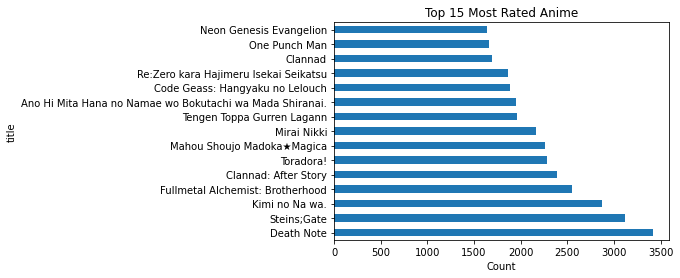

In [48]:
dfct.head(15).plot.barh()
plt.title('Top 15 Most Rated Anime')
plt.xlabel('Count')
plt.show()